In [19]:
# Import the necessary libraries
from PIL import Image
import numpy as np
import os
root_dir = os.getcwd()

src = os.path.join(root_dir,'images')
allFileNames = os.listdir(src)
 
# temp = np.zeros((218,178))
# load the image and convert into
# numpy array
data = np.zeros((218*178,1000))
i = 0
for name in allFileNames:

    img = Image.open('./images/' + name)
    img = img.convert("L")
    # asarray() class is used to convert
    # PIL images into NumPy arrays
    numpydata = np.asarray(img)
    
    data[:,i] = numpydata.flatten()
    i+=1

data = data.T
print(data.shape)
#image size is 218*178

(1000, 38804)


In [20]:
# import pandas as pd
# data=pd.read('face_data.csv', delimiter=',')
# print(data)
# #zero mean the data
# print(data.shape)
mean = np.mean(data,axis = 0)

In [21]:
data = data - mean.reshape(1,-1)
# for i in range(data.shape[0]):
#     data[i] = data[i]/np.amax(data[i])

In [22]:
from sklearn.decomposition import PCA
libpca = PCA().fit(data)
libfaces = libpca.components_

In [23]:
print(libfaces.shape)

(1000, 38804)


In [24]:
print(data.shape)

(1000, 38804)


In [25]:
def pca(data):
        """ Implement PCA via the eigendecomposition or the SVD.

        Parameters:
        1. data     (N,d) numpy ndarray. Each row as a feature vector.

        Outputs:
        1. W        (d,d) numpy array. PCA transformation matrix (Note that each **row** of the matrix should be a principal component)
        2. s        (d,) numpy array. Vector consisting of the amount  of variance explained in the data by each PCA feature.
        Note that the PCA features are ordered in **decreasing** amount of variance explained, by convention.
        """
        W = np.zeros((data.shape[1],data.shape[1]))
        s = np.zeros(data.shape[1])
        # Put your code below
        covariance_matrix = np.dot(data.T,data)/(data.shape[0])
        eigvals, eigvecs = np.linalg.eigh(covariance_matrix)
        eigvals = eigvals[::-1]
        eigvecs = eigvecs[:,::-1]
        W = eigvecs
        s = eigvals
        

        return (W,s)

In [26]:
data = data.T
print(data.shape)
eigenfaces = pca(data)

(38804, 1000)


In [27]:
W = eigenfaces[0]
s = eigenfaces[1]
print(W.shape)
print(data.shape)
# eigenfaces = W.dot(data)
eigenfaces = data.dot(W)
# temp = np.linalg.svd(data)
print(eigenfaces.shape)
eigenfaces=eigenfaces.T

(1000, 1000)
(38804, 1000)
(38804, 1000)


In [28]:
print(eigenfaces.shape)

(1000, 38804)


In [29]:
for i in range(eigenfaces.shape[0]):
    eigenfaces[i] = eigenfaces[i]/np.linalg.norm(eigenfaces[i])
    


In [30]:
# When you want to export the eigenface vectors they are in eigenfaces matrix stored as rows. You can take the first 100 or so vectors.
# Maybe dont use first 3 as paper mentions
# NEED TO RESHAPE IMAGE TO 218,178 and then flatten it 
# Export the mean also stored as (mean)

#Steps to first demo:
# 1) export eigenfaces and the mean 
# 2) use face tracking from lab 7 
# 3) between updating frames take roi resize (using library) to 218x177, subtract mean, and project onto the 100 or 
#    so eigenfaces we used. This gives u 100 or so values
# 4) treat 100 or so values as a vector and find the distanc of that vector to other stored vectors gotten by projecting images (after subtracting mean) of our faces onto the eigenfaces
# 5) Smallest distance cooresponds to the face of the person who we are likely tracking
# 6) classify that person by placing text at the bottom of ROI (Using opencv) saying their name


#below this is stuff irrelevant to our project




In [31]:
# test = Image.open('./images/000007.jpg')
# test = test.convert("L")
# test = np.asarray(img)
# # img = Image.fromarray(np.uint8(test) , 'L')
# # img.show()
# test = np.ndarray.flatten(test)
# test = test - mean

# toshow = np.zeros((218,178))
# for i in range(0,1000):
#     projected = eigenfaces[i] * np.dot(eigenfaces[i], test)
#     projected = projected.reshape((218,178))
#     toshow += projected

# # projected = eigenfaces[7] * np.dot(eigenfaces[7], test)
# # projected = projected.reshape((218,178))
# toshow= 255*((toshow - np.min(toshow)) / (np.max(toshow) - np.min(toshow)))

# img = Image.fromarray(np.uint8(toshow) , 'L')
# img.show()

In [32]:

# new_size = (178, 218)

# # Open the image file
# chazPIC = Image.open('./chazpic.jpg')
# chazPIC = chazPIC.resize(new_size, resample=Image.LANCZOS)
# chazPIC = np.array(chazPIC.convert("L"))
# img = Image.fromarray(np.uint8(chazPIC) , 'L')
# img.show()
# chazPIC = np.ndarray.flatten(chazPIC) - mean

# aahanPIC = Image.open('./aahanpic.jpg')
# aahanPIC = aahanPIC.resize(new_size, resample=Image.LANCZOS)
# aahanPIC = np.array(aahanPIC.convert("L"))
# aahanPIC = np.ndarray.flatten(aahanPIC) - mean

# rutvikPIC = Image.open('./rutvikface.jpg')
# rutvikPIC = rutvikPIC.resize(new_size, resample=Image.LANCZOS)
# rutvikPIC = np.array(rutvikPIC.convert("L"))
# rutvikPIC = np.ndarray.flatten(rutvikPIC) - mean


# finaltest = Image.open('./chazCropped.jpg')
# finaltest = finaltest.resize(new_size, resample=Image.LANCZOS)
# finaltest = np.array(finaltest.convert("L"))
# img = Image.fromarray(np.uint8(finaltest) , 'L')
# img.show()
# finaltest = np.ndarray.flatten(finaltest) - mean



In [33]:
# test = np.ndarray.flatten(np.asarray(resized_image)) - mean
# toshow = np.zeros((218,178))
# for i in range(2,1000):
#     projected = eigenfaces[i] * np.dot(eigenfaces[i], test)
#     projected = projected.reshape((218,178))
#     toshow += projected

# # projected = eigenfaces[7] * np.dot(eigenfaces[7], test)
# # projected = projected.reshape((218,178))
# toshow= 255*((toshow - np.min(toshow)) / (np.max(toshow) - np.min(toshow)))

# img = Image.fromarray(np.uint8(toshow) , 'L')
# img.show()
magicmatrix = eigenfaces[0:1000]
print(magicmatrix.shape)

(1000, 38804)


In [34]:

# chazdata =  magicmatrix @ chazPIC
# aahandata = magicmatrix @ aahanPIC
# rudydata = magicmatrix @ rutvikPIC
# finaldata = magicmatrix @ finaltest

# results = np.zeros(3)

# results[0] = np.linalg.norm(chazdata - finaldata)
# results[1] = np.linalg.norm(aahandata - finaldata)
# results[2] = np.linalg.norm(rudydata - finaldata)

In [35]:
# print(results)

In [36]:
import csv

# Define the data to be stored in the CSV file
# Open a new CSV file in write mode
with open("MeanAndFaces.csv", "w", newline="") as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)
    
    # Write the data to the CSV file
    writer.writerow(mean)
    for i in range(1000):
        writer.writerow(magicmatrix[i])
    # writer.writerow(aahandata)
    # writer.writerow(chazdata)
    # writer.writerow(rudydata)

KeyboardInterrupt: 

In [ ]:
# print(libfaces)

[[ 0.00797256  0.00793835  0.00792132 ...  0.00337824  0.00344499
   0.00348843]
 [ 0.00653661  0.00649523  0.0064303  ... -0.00501772 -0.00506891
  -0.00512935]
 [-0.00170691 -0.0017554  -0.00178037 ...  0.00247362  0.00237512
   0.00238311]
 ...
 [ 0.00024006 -0.00083089  0.00030707 ...  0.00200169  0.00211972
   0.00350075]
 [-0.00014286  0.00077347  0.00493813 ... -0.0026447  -0.00444323
  -0.00018883]
 [ 0.04717534 -0.02374778 -0.13788959 ... -0.00350091 -0.00177953
   0.01052739]]


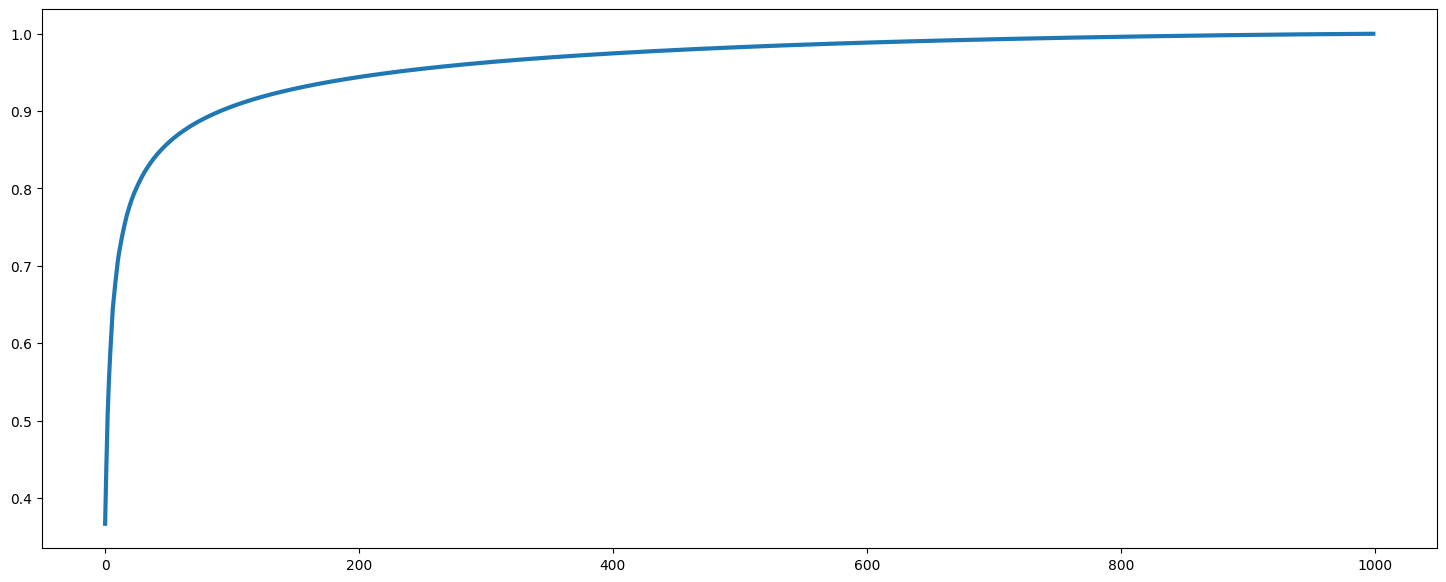

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
plt.plot(libpca.explained_variance_ratio_.cumsum(), lw=3)